In [27]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
RANDOM_SEED = 42

In [28]:
dataset = 'cords.csv'
model_save_path = 'saved_model/'
NUM_CLASSES = 28

In [29]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [30]:

y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
print(y_dataset)


[0 0 0 ... 1 1 1]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)
print(y_train)

[19  8 13 ...  1 21 12]


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])

In [33]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [34]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training

In [41]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=125,
    validation_data=(X_test, y_test),
)



Epoch 1/20
98/98 [==============================] - 0s 4ms/step - loss: 0.1532 - accuracy: 0.9659 - val_loss: 0.1529 - val_accuracy: 0.9647
Epoch 2/20
98/98 [==============================] - 0s 3ms/step - loss: 0.1488 - accuracy: 0.9663 - val_loss: 0.1476 - val_accuracy: 0.9701
Epoch 3/20
98/98 [==============================] - 0s 3ms/step - loss: 0.1407 - accuracy: 0.9692 - val_loss: 0.1430 - val_accuracy: 0.9766
Epoch 4/20
98/98 [==============================] - 0s 3ms/step - loss: 0.1347 - accuracy: 0.9722 - val_loss: 0.1354 - val_accuracy: 0.9771
Epoch 5/20
98/98 [==============================] - 0s 3ms/step - loss: 0.1281 - accuracy: 0.9747 - val_loss: 0.1325 - val_accuracy: 0.9775
Epoch 6/20
98/98 [==============================] - 0s 3ms/step - loss: 0.1231 - accuracy: 0.9777 - val_loss: 0.1243 - val_accuracy: 0.9768
Epoch 7/20
98/98 [==============================] - 0s 4ms/step - loss: 0.1182 - accuracy: 0.9789 - val_loss: 0.1224 - val_accuracy: 0.9738
Epoch 8/20
98/98 [==

In [42]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=100)

41/41 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9896


<!-- TODO : add loss function convergence graph for presentation -->

In [43]:

index = 77
print(np.array(X_test))
print(y_test[index])
predict_result = model.predict(np.array([X_test[index]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[[ 0.          0.          0.19934641 ... -0.11437909  0.2254902
  -0.16013072]
 [ 0.          0.          0.2590909  ... -0.38181818 -0.00454545
  -0.37272727]
 [ 0.          0.          0.30107528 ... -0.9569892  -0.02150538
  -0.8333333 ]
 ...
 [ 0.          0.         -0.21111111 ... -0.8148148  -0.45185184
  -0.9111111 ]
 [ 0.          0.          0.3153153  ... -0.4054054   0.2027027
  -0.4099099 ]
 [ 0.          0.         -0.18796992 ... -0.05639098  0.13157895
  -0.07142857]]
20
1/1 [==============================] - 0s 65ms/step
[6.7695762e-13 3.6383490e-09 6.8105495e-05 1.7135513e-07 4.5554196e-11
 8.2985441e-10 1.1186745e-04 2.4629792e-14 8.6552099e-11 2.4411796e-05
 2.1485546e-04 2.0903329e-16 7.7616476e-11 6.1547078e-05 8.6642052e-05
 5.0883058e-09 2.1482702e-13 9.7787108e-17 8.8853230e-11 8.7844295e-05
 9.9926800e-01 6.1848199e-15 9.9877255e-16 8.6866844e-18 2.0299713e-05
 5.6134628e-05 3.7423916e-08 2.2659558e-16]
20


In [44]:
model.save(model_save_path)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


127/127 [==============================] - 0s 1ms/step


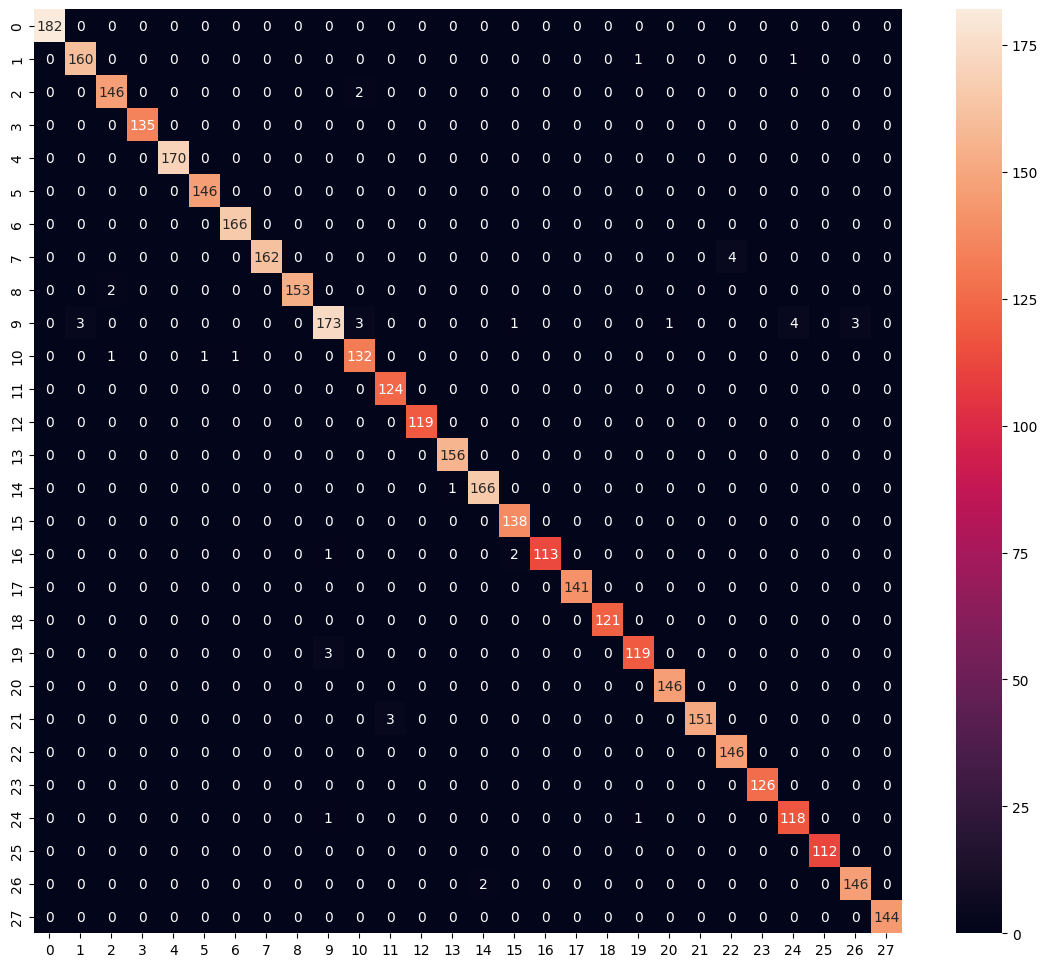

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       0.98      0.99      0.98       162
           2       0.98      0.99      0.98       148
           3       1.00      1.00      1.00       135
           4       1.00      1.00      1.00       170
           5       0.99      1.00      1.00       146
           6       0.99      1.00      1.00       166
           7       1.00      0.98      0.99       166
           8       1.00      0.99      0.99       155
           9       0.97      0.92      0.95       188
          10       0.96      0.98      0.97       135
          11       0.98      1.00      0.99       124
          12       1.00      1.00      1.00       119
          13       0.99      1.00      1.00       156
          14       0.99      0.99      0.99       167
          15       0.98      1.00      0.99       138
          16       1.00      0.97      0.99       116
     

In [45]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)